<a href="https://colab.research.google.com/github/svazrala04/Booking_Features/blob/main/TextAnalytics_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import pandas as pd
import numpy as np
np.random.seed(40)
import nltk
nltk.download('stopwords')
import spacy
sp = spacy.load("en_core_web_sm")
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import collections
nltk.download('punkt')
from nltk.tokenize import word_tokenize
sp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df=pd.read_excel("/content/BookingDotCom_HotelReviews.xlsx")

#Creating a sample of 8% from the original dataset.

In [ ]:
df1=df.sample(frac=0.08)
df1.shape

(41259, 12)

In [ ]:
nltk.download('stopwords')

nltkStopwords=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Text preprocessing

Changing the words to lower case and tokenizing them.

In [ ]:
def proc_words(review):
  proc_words=nltk.tokenize.word_tokenize(review)
  proc_words=[w.lower()  for w in proc_words]
  return proc_words

In [ ]:
df1['proc_words']=df1['Positive_Comments'].apply(proc_words)

In [ ]:
df1[['Positive_Comments','proc_words']].head(10)

,Positive_Comments,proc_words
14465,Comfy room well appointed,"[comfy, room, well, appointed]"
212948,Good location easy access to various facilities,"[good, location, easy, access, to, various, fa..."
409850,Location close to train station staff helpful...,"[location, close, to, train, station, staff, h..."
372211,The lobby looks nice,"[the, lobby, looks, nice]"
26401,Good for Victoria station ground floor is qui...,"[good, for, victoria, station, ground, floor, ..."
435351,The staff was extremely friendly Great Locati...,"[the, staff, was, extremely, friendly, great, ..."
346167,The hotel was very clean and good value for m...,"[the, hotel, was, very, clean, and, good, valu..."
367976,Location was good and also good view of rambl...,"[location, was, good, and, also, good, view, o..."
32234,location and style of rooms and general staff,"[location, and, style, of, rooms, and, general..."
323649,Rooms on upper floors have a superb view of A...,"[rooms, on, upper, floors, have, a, superb, vi..."


#Method to  Clean the text(Stopword removal)



In [ ]:
def processed_words(review):
  proc_Words= nltk.tokenize.word_tokenize(review)
  proc_Cleanwords= [w for w in proc_Words if  w.isalnum()]
  proc_Cleanwords=[w.lower() for w in proc_Cleanwords if w not in nltkStopwords]
  return proc_Cleanwords

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

#Method to get features from each review

In [ ]:
def review_nouns(processed_words):
  if len(processed_words)>0:
    nltkPos=nltk.pos_tag(processed_words, tagset='universal')
    word, pos= zip(*nltkPos)
    nltkNouns= []
    for i, w in enumerate(word):
      if pos[i]=="NOUN":
        nltkNouns.append(word[i])
    return nltkNouns

In [ ]:
df1['pos_processed_words']=df1['Positive_Comments'].apply(processed_words)

In [ ]:
df1['neg_processed_words']=df1['Negative_Comments'].apply(processed_words)

In [ ]:
df1['neg_processed_words'].head(10)

14465                                        [no, negative]
212948            [they, need, clean, room, often, staying]
409850                                       [no, negative]
372211                            [no, carpet, rooms, cold]
26401     [cramped, room, 7th, floor, wing, block, singl...
435351                                       [no, negative]
346167    [some, state, need, put, 100, euros, staying, ...
367976                                   [the, room, small]
32234     [uncomfortable, bed, fairness, budget, hotel, ...
323649    [my, items, laundry, lost, ladies, working, re...
Name: neg_processed_words, dtype: object

In [ ]:
df1['pos_processed_nouns']=df1['pos_processed_words'].apply(review_nouns)
df1[['pos_processed_words','pos_processed_nouns']].head(10)

,pos_processed_words,pos_processed_nouns
14465,"[comfy, room, well, appointed]","[comfy, room]"
212948,"[good, location, easy, access, various, facili...","[location, access, facilities]"
409850,"[location, close, train, station, staff, helpf...","[location, station, staff, clean, rooms]"
372211,"[the, lobby, looks, nice]",[lobby]
26401,"[good, victoria, station, ground, floor, quite...","[victoria, station, ground, floor, corridors, ..."
435351,"[the, staff, extremely, friendly, great, locat...","[staff, location, sagrada, familia]"
346167,"[the, hotel, clean, good, value, money, the, s...","[hotel, value, money, staff, metro, road, min,..."
367976,"[location, good, also, good, view, ramblas, th...","[location, good, view, staff, helpful]"
32234,"[location, style, rooms, general, staff]","[location, style, rooms, staff]"
323649,"[rooms, upper, floors, superb, view, amsterdam...","[rooms, floors, view, amsterdam, pool, saunas,..."


In [ ]:
df1['neg_processed_nouns']=df1['neg_processed_words'].apply(review_nouns)

In [ ]:
df1[['Positive_Comments','pos_processed_words']].head(10)

,Positive_Comments,pos_processed_words
14465,Comfy room well appointed,"[comfy, room, well, appointed]"
212948,Good location easy access to various facilities,"[good, location, easy, access, various, facili..."
409850,Location close to train station staff helpful...,"[location, close, train, station, staff, helpf..."
372211,The lobby looks nice,"[the, lobby, looks, nice]"
26401,Good for Victoria station ground floor is qui...,"[good, victoria, station, ground, floor, quite..."
435351,The staff was extremely friendly Great Locati...,"[the, staff, extremely, friendly, great, locat..."
346167,The hotel was very clean and good value for m...,"[the, hotel, clean, good, value, money, the, s..."
367976,Location was good and also good view of rambl...,"[location, good, also, good, view, ramblas, th..."
32234,location and style of rooms and general staff,"[location, style, rooms, general, staff]"
323649,Rooms on upper floors have a superb view of A...,"[rooms, upper, floors, superb, view, amsterdam..."


In [ ]:
df1[['Negative_Comments','neg_processed_nouns']].head(10)

In [ ]:
total_pos_nouns=[]
for i in df1['pos_processed_nouns']:
  if i is not None:
    total_pos_nouns.extend(i)

In [ ]:
total_neg_nouns=[]
for i in df1['neg_processed_nouns']:
  if i is not None:
    total_neg_nouns.extend(i)

In [ ]:
from collections import Counter
count=Counter(total_pos_nouns)
print(count)

Counter({'staff': 15734, 'location': 15421, 'room': 11162, 'hotel': 9909, 'breakfast': 6092, 'rooms': 3252, 'i': 3088, 'bed': 2732, 'station': 2276, 'everything': 2220, 'service': 2038, 'bar': 1482, 'area': 1334, 'view': 1319, 'bathroom': 1314, 'reception': 1280, 'stay': 1254, 'food': 1244, 'city': 1243, 'facilities': 1223, 'comfy': 1202, 'helpful': 1201, 'excellent': 1189, 'beds': 1079, 'clean': 1017, 'walk': 985, 'restaurants': 955, 'value': 884, 'size': 880, 'place': 845, 'restaurant': 833, 'night': 759, 'time': 740, 'distance': 740, 'metro': 735, 'coffee': 722, 'price': 696, 'minutes': 694, 'day': 691, 'money': 686, 'london': 683, 'perfect': 658, 'tube': 656, 'pool': 608, 'access': 595, 'shower': 590, 'check': 579, 'street': 577, 'quality': 570, 'choice': 541, 'floor': 527, 'nothing': 524, 'design': 518, 'train': 499, 'wifi': 463, 'centre': 462, 'park': 461, 'convenient': 458, 'center': 455, 'decor': 443, 'kind': 437, 'views': 429, 'desk': 425, 'water': 414, 'bus': 398, 'nice': 396

#Question 1

Most mentioned features from hotels by the customers:
1. Staff, 2.Location, 3.Room, 4.Breakast 5.Hotel

In [ ]:
count_neg=Counter(total_neg_nouns)
print(count_neg)


Counter({'room': 14132, 'i': 6012, 'hotel': 5816, 'breakfast': 4109, 'staff': 3115, 'nothing': 3080, 'rooms': 2751, 'bathroom': 2138, 'night': 1992, 'bit': 1582, 'service': 1545, 'bed': 1478, 'bar': 1412, 'time': 1368, 'reception': 1294, 'floor': 1256, 'day': 1256, 'price': 1249, 'water': 1196, 'air': 1065, 'coffee': 985, 'work': 931, 'location': 924, 'food': 919, 'door': 898, 'shower': 864, 'check': 850, 'area': 838, 'people': 834, 'everything': 786, 'view': 763, 'morning': 733, 'stay': 727, 'noise': 689, 'restaurant': 688, 'wifi': 687, 'facilities': 625, 'pool': 607, 'money': 595, 'beds': 581, 'window': 576, 'problem': 576, 'tv': 576, 'size': 556, 'way': 534, 'tea': 517, 'toilet': 511, 'bath': 507, 'times': 504, 'city': 492, 'days': 481, 'star': 472, 'hotels': 460, 'pay': 451, 'space': 443, 'place': 442, 'thing': 437, 'guests': 435, 'bedroom': 432, 'street': 427, 'get': 417, 'desk': 416, 'minutes': 413, 'use': 407, 'quality': 395, 'person': 391, 'lift': 385, 'anything': 384, 'card': 

Most features mentioned by customers in negative reviews
1.Room, 2. Hotel, 3.Breakfast, 4. Staff, 5.Bathroom

#Creating  columns with the details of Traveller type and also Trip type

In [ ]:
Traveller_type=[]
Trip_type=[]
for each in df1['Tags']:
  eachsplit=each.split(" ', '")
  Traveller_type.append(eachsplit[1].replace(" ",""))
  Trip_type.append(eachsplit[0].replace("[' ",""))

Traveller_type

['Solotraveler',
 'Couple',
 'Couple',
 'Solotraveler',
 'Couple',
 'Couple',
 'Group',
 'Familywithyoungchildren',
 'Solotraveler',
 'SuperiorDoubleTwinRoom',
 'Group',
 'Couple',
 'Couple',
 'Couple',
 'Couple',
 'Couple',
 'Solotraveler',
 'Solotraveler',
 'Couple',
 'Couple',
 'Couple',
 'Solotraveler',
 'Familywithyoungchildren',
 'Couple',
 'Solotraveler',
 'Couple',
 'Familywithyoungchildren',
 'Solotraveler',
 'Solotraveler',
 'Couple',
 'Couple',
 'Group',
 'Couple',
 'Couple',
 'StandardRoom',
 'Couple',
 'Couple',
 'Couple',
 'Solotraveler',
 'Couple',
 'Familywithyoungchildren',
 'Solotraveler',
 'Solotraveler',
 'Familywitholderchildren',
 'Solotraveler',
 'Couple',
 'Solotraveler',
 'Couple',
 'Couple',
 'Couple',
 'Couple',
 'Group',
 'Couple',
 'Couple',
 'Couple',
 'Group',
 'Familywithyoungchildren',
 'Solotraveler',
 'Couple',
 'Couple',
 'Couple',
 'Solotraveler',
 'Familywithyoungchildren',
 'Group',
 'Group',
 '2rooms',
 'Solotraveler',
 'Solotraveler',
 'Solotrav

In [ ]:
df1['Traveller_type']=Traveller_type
df1['Trip_type']=Trip_type

In [ ]:
df1[['Traveller_type','Positive_Comments','Trip_type']].head(10)

,Traveller_type,Positive_Comments,Trip_type
14465,Solotraveler,Comfy room well appointed,Business trip
212948,Couple,Good location easy access to various facilities,Leisure trip
409850,Couple,Location close to train station staff helpful...,Leisure trip
372211,Solotraveler,The lobby looks nice,Business trip
26401,Couple,Good for Victoria station ground floor is qui...,Leisure trip
435351,Couple,The staff was extremely friendly Great Locati...,Leisure trip
346167,Group,The hotel was very clean and good value for m...,Leisure trip
367976,Familywithyoungchildren,Location was good and also good view of rambl...,Leisure trip
32234,Solotraveler,location and style of rooms and general staff,Business trip
323649,SuperiorDoubleTwinRoom,Rooms on upper floors have a superb view of A...,Couple


In [ ]:
total_solo_pos_nouns=[]
for i in df1.loc[df1.Traveller_type =="Solotraveler", 'pos_processed_nouns']:
   if i is not None:
     total_solo_pos_nouns.extend(i)
total_solo_pos_nouns

['comfy',
 'room',
 'lobby',
 'location',
 'style',
 'rooms',
 'staff',
 'location',
 'bathroom',
 'light',
 'idea',
 'dark',
 'rooms',
 'room',
 'bed',
 'service',
 'style',
 'hotel',
 'staff',
 'location',
 'tube',
 'hyde',
 'park',
 'end',
 'room',
 'location',
 'room',
 'temperature',
 'controls',
 'bathroom',
 'facilities',
 'location',
 'restaurant',
 'place',
 'sit',
 'coffee',
 'newspaper',
 'morning',
 'simple',
 'room',
 'room',
 'price',
 'wifi',
 'connection',
 'staff',
 'location',
 'staff',
 'location',
 'lots',
 'facilities',
 'bar',
 'restaurants',
 'ambience',
 'hotel',
 'friend',
 'home',
 'room',
 'options',
 'dinner',
 'college',
 'hall',
 'street',
 'staff',
 'location',
 'breakfast',
 'supberb',
 'room',
 'confortable',
 'view',
 'room',
 'staff',
 'room',
 'decor',
 'food',
 'room',
 'shag',
 'carpet',
 'value',
 'money',
 'part',
 'town',
 'terrace',
 'food',
 'place',
 'city',
 'breakfast',
 'hotel',
 'hotel',
 'location',
 'staff',
 'rooms',
 'bedding',
 'towe

In [ ]:
count_solo=Counter(total_solo_pos_nouns)
print(count_solo)

Counter({'location': 2949, 'staff': 2729, 'room': 2192, 'hotel': 1624, 'i': 1086, 'breakfast': 1070, 'rooms': 569, 'bed': 543, 'station': 439, 'everything': 408, 'service': 403, 'bathroom': 267, 'area': 250, 'reception': 244, 'bar': 239, 'facilities': 219, 'food': 215, 'view': 204, 'clean': 204, 'stay': 202, 'value': 198, 'city': 197, 'place': 192, 'helpful': 190, 'comfy': 181, 'price': 181, 'restaurant': 175, 'excellent': 170, 'walk': 156, 'size': 153, 'night': 147, 'quality': 142, 'money': 139, 'coffee': 138, 'restaurants': 136, 'london': 136, 'perfect': 132, 'metro': 128, 'time': 128, 'tube': 125, 'check': 124, 'wifi': 121, 'distance': 120, 'design': 120, 'business': 119, 'street': 118, 'nothing': 117, 'access': 114, 'shower': 114, 'hotels': 113, 'day': 111, 'kind': 110, 'convenient': 109, 'minutes': 105, 'floor': 104, 'beds': 99, 'center': 90, 'train': 84, 'airport': 83, 'desk': 82, 'style': 81, 'lobby': 80, 'park': 80, 'water': 80, 'nice': 79, 'decor': 78, 'choice': 78, 'pool': 78

Most preferred features as Solo traveller
1.Location, 2. Staff, 3. Room, 4. Hotel, 5. Breakfast

In [ ]:
total_group_pos_nouns=[]
for i in df1.loc[df1.Traveller_type=="Group",'pos_processed_nouns']:
   if i is not None:
     total_group_pos_nouns.extend(i)
total_group_pos_nouns

['hotel',
 'value',
 'money',
 'staff',
 'metro',
 'road',
 'min',
 'ride',
 'time',
 'location',
 'bed',
 'view',
 'room',
 'convenient',
 'station',
 'minute',
 'hotel',
 'staff',
 'hotel',
 'staff',
 'rooms',
 'view',
 'location',
 'metro',
 'train',
 'connections',
 'hotel',
 'distance',
 'station',
 'airport',
 'mins',
 'cost',
 'app',
 'metro',
 'stations',
 'mins',
 'morning',
 'jazz',
 'breakfast',
 'amazing',
 'bathroom',
 'breakfast',
 'amazing',
 'hotel',
 'i',
 'books',
 'ambassadors',
 'roof',
 'bar',
 'breakfast',
 'plenty',
 'variety',
 'facilities',
 'room',
 'kitchen',
 'right',
 'roof',
 'pool',
 'awesome',
 'efficient',
 'rooms',
 'hotel',
 'metro',
 'decor',
 'etc',
 'pleasant',
 'location',
 'distance',
 'restaurants',
 'shaftesbury',
 'suites',
 'arch',
 'hyde',
 'park',
 'end',
 'neighborhood',
 'lots',
 'amenities',
 'minute',
 'tube',
 'ride',
 'square',
 'heart',
 'rooms',
 'staff',
 'staff',
 'bar',
 'lounge',
 'room',
 'hotel',
 'rooms',
 'bikes',
 'cycle',


In [ ]:
count_group=Counter(total_group_pos_nouns)
print(count_group)

Counter({'staff': 2030, 'location': 1937, 'hotel': 1238, 'room': 1180, 'breakfast': 818, 'rooms': 528, 'i': 370, 'bed': 296, 'everything': 272, 'station': 271, 'beds': 258, 'bar': 235, 'service': 224, 'comfy': 179, 'area': 178, 'reception': 165, 'helpful': 162, 'excellent': 161, 'clean': 156, 'bathroom': 150, 'facilities': 147, 'food': 145, 'value': 137, 'city': 136, 'stay': 136, 'view': 123, 'restaurants': 123, 'money': 107, 'walk': 103, 'size': 100, 'distance': 95, 'restaurant': 92, 'price': 89, 'metro': 88, 'place': 87, 'time': 83, 'night': 82, 'coffee': 82, 'london': 82, 'choice': 80, 'pool': 78, 'minutes': 76, 'perfect': 76, 'day': 75, 'tube': 74, 'shower': 71, 'train': 70, 'nothing': 67, 'street': 66, 'access': 65, 'park': 64, 'check': 64, 'convenient': 59, 'decor': 58, 'wifi': 58, 'floor': 54, 'desk': 54, 'water': 52, 'quality': 52, 'help': 51, 'nice': 51, 'bus': 50, 'cleanliness': 49, 'buffet': 48, 'transport': 48, 'bars': 47, 'friends': 47, 'hotels': 47, 'centre': 46, 'views':

Most preferred features as group traveller apart from (staff, locatio, hotel, room, breakfast)
1. service, 2. area, 3. Reception 4.Bathroom, 5. Faciities.

In [ ]:
total_busitrip_pos_nouns=[]
for i in df1.loc[df1.Trip_type=="Business trip", 'pos_processed_nouns']:
   if i is not None:
     total_busitrip_pos_nouns.extend(i)
total_busitrip_pos_nouns

['comfy',
 'room',
 'lobby',
 'location',
 'style',
 'rooms',
 'staff',
 'bed',
 'service',
 'location',
 'tube',
 'hyde',
 'park',
 'end',
 'room',
 'location',
 'room',
 'temperature',
 'controls',
 'bathroom',
 'facilities',
 'location',
 'restaurant',
 'place',
 'sit',
 'coffee',
 'newspaper',
 'morning',
 'simple',
 'room',
 'room',
 'price',
 'wifi',
 'connection',
 'staff',
 'location',
 'staff',
 'metro',
 'train',
 'connections',
 'hotel',
 'distance',
 'station',
 'airport',
 'mins',
 'cost',
 'app',
 'metro',
 'stations',
 'mins',
 'morning',
 'jazz',
 'breakfast',
 'amazing',
 'ambience',
 'hotel',
 'friend',
 'home',
 'room',
 'options',
 'dinner',
 'college',
 'hall',
 'street',
 'staff',
 'view',
 'room',
 'staff',
 'room',
 'decor',
 'food',
 'room',
 'shag',
 'carpet',
 'value',
 'money',
 'part',
 'town',
 'terrace',
 'food',
 'staff',
 'staff',
 'staff',
 'hotel',
 'place',
 'city',
 'breakfast',
 'hotel',
 'staff',
 'rooms',
 'bedding',
 'towels',
 'location',
 'fan

In [ ]:
count_busitrip=Counter(total_busitrip_pos_nouns)
print(count_busitrip)

Counter({'location': 2220, 'staff': 1981, 'room': 1468, 'hotel': 1149, 'breakfast': 880, 'i': 588, 'rooms': 533, 'bed': 373, 'service': 298, 'station': 286, 'everything': 264, 'bathroom': 195, 'food': 193, 'bar': 192, 'reception': 186, 'area': 179, 'facilities': 172, 'value': 166, 'city': 166, 'restaurant': 156, 'clean': 149, 'price': 145, 'helpful': 145, 'view': 144, 'excellent': 142, 'place': 141, 'comfy': 136, 'stay': 131, 'quality': 126, 'business': 125, 'size': 122, 'money': 114, 'wifi': 104, 'restaurants': 96, 'perfect': 95, 'london': 94, 'tube': 92, 'beds': 90, 'walk': 89, 'coffee': 85, 'nothing': 85, 'night': 85, 'hotels': 85, 'design': 85, 'center': 84, 'time': 82, 'shower': 79, 'check': 78, 'metro': 77, 'nice': 75, 'street': 74, 'distance': 72, 'minutes': 72, 'convenient': 72, 'access': 69, 'lobby': 68, 'floor': 68, 'day': 66, 'style': 64, 'train': 63, 'kind': 61, 'cleanliness': 59, 'water': 58, 'desk': 57, 'work': 56, 'comfort': 56, 'park': 55, 'centre': 54, 'position': 54, 

Most preferred features for Business trip:
1.Food, 2. Bar, 3. Reception, 4. City, 5. Restaurant

In [ ]:
total_leisure_pos_nouns=[]
for i in df1.loc[df1.Trip_type=="Leisure trip",'pos_processed_nouns']:
   if i is not None:
     total_leisure_pos_nouns.extend(i)
total_leisure_pos_nouns

['location',
 'access',
 'facilities',
 'location',
 'station',
 'staff',
 'clean',
 'rooms',
 'victoria',
 'station',
 'ground',
 'floor',
 'corridors',
 'century',
 'staff',
 'location',
 'sagrada',
 'familia',
 'hotel',
 'value',
 'money',
 'staff',
 'metro',
 'road',
 'min',
 'ride',
 'time',
 'location',
 'good',
 'view',
 'staff',
 'helpful',
 'location',
 'bed',
 'view',
 'room',
 'convenient',
 'station',
 'minute',
 'hotel',
 'hotel',
 'selection',
 'lounge',
 'location',
 'breakfast',
 'thotel',
 'building',
 'modern',
 'location',
 'decoration',
 'location',
 'bathroom',
 'light',
 'idea',
 'dark',
 'rooms',
 'room',
 'convenience',
 'london',
 'things',
 'service',
 'hotel',
 'superb',
 'board',
 'location',
 'staff',
 'rooms',
 'location',
 'base',
 'city',
 'place',
 'standard',
 'hotel',
 'comfy',
 'rooms',
 'thames',
 'wharf',
 'service',
 'style',
 'hotel',
 'convenient',
 'location',
 'restaurant',
 'road',
 'mamma',
 'rosa',
 'treat',
 'staff',
 'location',
 'style',

In [ ]:
count_leisure=Counter(total_leisure_pos_nouns)
print(count_leisure)

Counter({'staff': 13319, 'location': 12830, 'room': 9356, 'hotel': 8487, 'breakfast': 5044, 'rooms': 2656, 'i': 2365, 'bed': 2285, 'station': 1938, 'everything': 1880, 'service': 1675, 'bar': 1255, 'view': 1134, 'area': 1125, 'stay': 1087, 'bathroom': 1085, 'reception': 1054, 'city': 1051, 'comfy': 1028, 'facilities': 1024, 'helpful': 1020, 'excellent': 1018, 'food': 1008, 'beds': 960, 'walk': 875, 'clean': 842, 'restaurants': 841, 'size': 737, 'value': 690, 'place': 687, 'distance': 656, 'restaurant': 651, 'night': 649, 'metro': 644, 'time': 631, 'coffee': 621, 'minutes': 608, 'day': 607, 'london': 568, 'tube': 550, 'money': 549, 'pool': 548, 'perfect': 537, 'price': 535, 'access': 514, 'shower': 494, 'check': 492, 'street': 484, 'choice': 481, 'floor': 451, 'quality': 430, 'nothing': 424, 'train': 423, 'design': 418, 'park': 396, 'centre': 393, 'views': 385, 'decor': 380, 'convenient': 375, 'kind': 358, 'center': 358, 'desk': 358, 'bus': 352, 'water': 345, 'wifi': 341, 'minute': 317,

Most preferred features from a leisure trip
1. Area, 2. View, 3. Stay, 4. City, 5.Food

In [ ]:
total_couple_pos_nouns=[]
for i in df1.loc[df1.Traveller_type=="Couple","pos_processed_nouns"]:
   if i is not None:
     total_couple_pos_nouns.extend(i)
total_couple_pos_nouns

['location',
 'access',
 'facilities',
 'location',
 'station',
 'staff',
 'clean',
 'rooms',
 'victoria',
 'station',
 'ground',
 'floor',
 'corridors',
 'century',
 'staff',
 'location',
 'sagrada',
 'familia',
 'hotel',
 'selection',
 'lounge',
 'location',
 'breakfast',
 'thotel',
 'building',
 'modern',
 'location',
 'decoration',
 'convenience',
 'london',
 'things',
 'service',
 'hotel',
 'superb',
 'board',
 'location',
 'staff',
 'rooms',
 'location',
 'base',
 'city',
 'place',
 'standard',
 'hotel',
 'comfy',
 'rooms',
 'thames',
 'wharf',
 'staff',
 'location',
 'clean',
 'husband',
 'valentines',
 'room',
 'cake',
 'chocolate',
 'card',
 'minutes',
 'courtesy',
 'call',
 'room',
 'room',
 'everything',
 'gowns',
 'slippers',
 'breakfast',
 'eggs',
 'choice',
 'breakfast',
 'fruit',
 'pastries',
 'cereals',
 'chairs',
 'service',
 'i',
 'fault',
 'business',
 'room',
 'room',
 'clean',
 'staff',
 'nice',
 'station',
 'hotel',
 'staff',
 'everything',
 'hotel',
 'food',
 'ro

In [ ]:
count_couple=Counter(total_couple_pos_nouns)
print(count_couple)

Counter({'staff': 7876, 'location': 7345, 'room': 5807, 'hotel': 5119, 'breakfast': 2928, 'bed': 1512, 'rooms': 1425, 'everything': 1098, 'station': 1091, 'i': 1080, 'service': 1011, 'bar': 814, 'view': 763, 'stay': 681, 'bathroom': 679, 'city': 670, 'area': 659, 'comfy': 657, 'facilities': 631, 'food': 630, 'excellent': 623, 'reception': 614, 'helpful': 609, 'walk': 519, 'restaurants': 510, 'clean': 465, 'size': 453, 'restaurant': 414, 'beds': 403, 'night': 399, 'place': 390, 'time': 387, 'value': 387, 'distance': 385, 'minutes': 380, 'coffee': 370, 'metro': 369, 'day': 361, 'london': 332, 'shower': 328, 'tube': 312, 'perfect': 308, 'money': 304, 'access': 300, 'price': 294, 'pool': 292, 'quality': 289, 'check': 287, 'floor': 286, 'choice': 286, 'street': 275, 'views': 269, 'centre': 264, 'design': 248, 'train': 245, 'nothing': 234, 'decor': 230, 'park': 215, 'desk': 214, 'center': 203, 'water': 201, 'convenient': 199, 'superb': 196, 'bus': 192, 'nice': 191, 'help': 186, 'wifi': 185, 

Preferred features for couple:
1.Coffee, 2. access , 3. pool, 4.Quality 5. Views

In [ ]:
total_familyyoung_pos_nouns=[]
for i in df1.loc[df1.Traveller_type=="Familywithyoungchildren","pos_processed_nouns"]:
   if i is not None:
     total_familyyoung_pos_nouns.extend(i)
total_familyyoung_pos_nouns

['location',
 'good',
 'view',
 'staff',
 'helpful',
 'service',
 'style',
 'hotel',
 'convenient',
 'location',
 'restaurant',
 'road',
 'mamma',
 'rosa',
 'treat',
 'locaton',
 'bed',
 'location',
 'family',
 'room',
 'jackusy',
 'parents',
 'bedroom',
 'day',
 'breakfast',
 'compensation',
 'location',
 'staff',
 'style',
 'hotel',
 'hotel',
 'food',
 'rooms',
 'staff',
 'breakfast',
 'afternoon',
 'walk',
 'manor',
 'house',
 'tube',
 'station',
 'line',
 'house',
 'simple',
 'children',
 'staff',
 'location',
 'good',
 'staff',
 'staff',
 'staff',
 'decor',
 'cleanliness',
 'rooms',
 'view',
 'windows',
 'beds',
 'temperature',
 'control',
 'hotel',
 'neighborhood',
 'tram',
 'connection',
 'amenities',
 'daughters',
 'birthday',
 'quality',
 'toiletries',
 'bed',
 'service',
 'staff',
 'realy',
 'nice',
 'staff',
 'qeustions',
 'languages',
 'hotel',
 'elevator',
 'party',
 'design',
 'hotel',
 'history',
 'newspaper',
 'office',
 'location',
 'minutes',
 'station',
 'noise',
 's

In [ ]:
count_familyyoung=Counter(total_familyyoung_pos_nouns)
print(count_familyyoung)

Counter({'location': 1842, 'staff': 1783, 'room': 1154, 'hotel': 1136, 'breakfast': 801, 'rooms': 447, 'station': 291, 'i': 286, 'everything': 237, 'service': 227, 'bed': 220, 'beds': 179, 'city': 157, 'view': 153, 'area': 148, 'food': 145, 'reception': 144, 'excellent': 142, 'facilities': 139, 'stay': 136, 'family': 130, 'helpful': 129, 'walk': 129, 'bathroom': 122, 'clean': 116, 'place': 110, 'pool': 109, 'bar': 104, 'size': 101, 'restaurants': 101, 'comfy': 100, 'metro': 95, 'distance': 94, 'minutes': 92, 'value': 92, 'restaurant': 88, 'tube': 86, 'day': 82, 'time': 82, 'center': 80, 'london': 79, 'money': 78, 'coffee': 76, 'night': 75, 'access': 74, 'perfect': 74, 'kids': 70, 'kind': 68, 'price': 68, 'check': 65, 'nothing': 64, 'choice': 64, 'design': 59, 'park': 59, 'quality': 58, 'wifi': 57, 'train': 57, 'bus': 56, 'street': 55, 'convenient': 54, 'people': 54, 'floor': 54, 'children': 50, 'help': 50, 'attractions': 49, 'min': 49, 'water': 49, 'space': 48, 'transport': 46, 'comfor

Preferred features by family with young children
1.Coffee, 2.accessiblity 3.Design, 4.Convienent 5. Street

# Identifying Country

In [ ]:
def ext_country(address):
  countries=['United Kingdom','France','Italy','Spain']
  spCorpus=sp(address)
  for ent in spCorpus.ents:
    if ent.label_=="GPE":
      if ent.text in countries:
        return ent.text
      else:
        return "Others"


In [ ]:
df1['Hotel_Country']=df1['Hotel_Address'].apply(ext_country)

In [ ]:
df1['Hotel_Country'].head(60)

14465     United Kingdom
212948    United Kingdom
409850            Others
372211            Others
26401     United Kingdom
435351            Others
346167            Others
367976            Others
32234     United Kingdom
323649            Others
300228            Others
315240            Others
270314            Others
500938            Others
288989            Others
289524            Others
363595            Others
480464            Others
183750            Others
386551            Others
125511    United Kingdom
27461     United Kingdom
482024            Others
384378            Others
340631            Others
411707            Others
186422    United Kingdom
365027    United Kingdom
406483             Italy
170667    United Kingdom
387149            Others
362280    United Kingdom
251000            Others
237592            Others
512842    United Kingdom
178133              None
1856      United Kingdom
392184            Others
483476            Others
421937            Others


In [ ]:
total_select_country_posnouns=[]
for i in df1.loc[(df1.Hotel_Country=="United Kingdom")|(df1.Hotel_Country=="France")|(df1.Hotel_Country=="Spain")|(df1.Hotel_Country=="Italy"),"pos_processed_nouns"]:
   if i is not None:
     total_select_country_posnouns.extend(i)
total_select_country_posnouns

['comfy',
 'room',
 'location',
 'access',
 'facilities',
 'victoria',
 'station',
 'ground',
 'floor',
 'corridors',
 'century',
 'location',
 'style',
 'rooms',
 'staff',
 'hotel',
 'comfy',
 'rooms',
 'thames',
 'wharf',
 'bed',
 'service',
 'locaton',
 'location',
 'tube',
 'hyde',
 'park',
 'end',
 'room',
 'location',
 'husband',
 'valentines',
 'room',
 'cake',
 'chocolate',
 'card',
 'minutes',
 'courtesy',
 'call',
 'room',
 'room',
 'everything',
 'gowns',
 'slippers',
 'breakfast',
 'eggs',
 'choice',
 'breakfast',
 'fruit',
 'pastries',
 'cereals',
 'chairs',
 'service',
 'i',
 'fault',
 'staff',
 'nothing',
 'hotel',
 'food',
 'room',
 'vacation',
 'comfy',
 'bed',
 'pastries',
 'room',
 'arrival',
 'location',
 'decor',
 'food',
 'room',
 'shag',
 'carpet',
 'value',
 'money',
 'part',
 'town',
 'service',
 'location',
 'views',
 'value',
 'money',
 'stay',
 'penny',
 'hotel',
 'food',
 'rooms',
 'staff',
 'breakfast',
 'afternoon',
 'walk',
 'manor',
 'house',
 'tube',
 

In [ ]:
count_select_country_posnouns=Counter(total_select_country_posnouns)
print(count_select_country_posnouns)

Counter({'staff': 3351, 'location': 3030, 'room': 2497, 'hotel': 1790, 'breakfast': 1143, 'bed': 690, 'i': 640, 'rooms': 616, 'service': 452, 'station': 443, 'everything': 436, 'comfy': 336, 'food': 321, 'tube': 319, 'bar': 315, 'bathroom': 300, 'stay': 293, 'london': 290, 'area': 282, 'reception': 278, 'excellent': 269, 'facilities': 268, 'view': 253, 'helpful': 250, 'beds': 236, 'clean': 236, 'value': 218, 'size': 203, 'restaurant': 200, 'restaurants': 200, 'park': 173, 'price': 172, 'walk': 164, 'night': 159, 'money': 151, 'place': 149, 'access': 141, 'time': 135, 'shower': 134, 'coffee': 131, 'choice': 129, 'check': 129, 'nothing': 127, 'day': 126, 'quality': 125, 'perfect': 124, 'minutes': 121, 'decor': 116, 'distance': 105, 'city': 104, 'street': 100, 'pool': 96, 'views': 94, 'cleanliness': 94, 'water': 93, 'floor': 92, 'convenient': 86, 'wifi': 83, 'nice': 83, 'lounge': 83, 'kind': 80, 'wembley': 80, 'hall': 78, 'help': 77, 'superb': 76, 'transport': 74, 'road': 74, 'kensington'

Preferred features for United Kindom, Spain, Italy, France are Enviromnet, Hospitality, Gardens, Apartment

In [ ]:
total_select_country_negnouns=[]
for i in df1.loc[(df1.Hotel_Country=="United Kingdom")|(df1.Hotel_Country=="France")|(df1.Hotel_Country=="Spain")|(df1.Hotel_Country=="Italy"),"neg_processed_nouns"]:
   if i is not None:
     total_select_country_negnouns.extend(i)
total_select_country_negnouns

['room',
 'room',
 'floor',
 'block',
 'room',
 'bed',
 'hotels',
 'room',
 'grades',
 'charges',
 'rooms',
 'countries',
 'bars',
 'baths',
 'person',
 'get',
 'walk',
 'showers',
 'bed',
 'budget',
 'hotel',
 'sales',
 'staff',
 'advantage',
 'owner',
 'business',
 'hands',
 'date',
 'incorrect',
 'booking',
 'side',
 'london',
 'maintenance',
 'hardware',
 'room',
 'finishing',
 'date',
 'traffic',
 'noise',
 'noise',
 'corridor',
 'doorbells',
 'room',
 'children',
 'hotel',
 'ring',
 'bells',
 'night',
 'til',
 'staff',
 'helpful',
 'security',
 'kids',
 'rounds',
 'times',
 'room',
 'twin',
 'beds',
 'room',
 'hall',
 'painting',
 'smell',
 'upgrade',
 'room',
 'people',
 'business',
 'u',
 's',
 'pleasure',
 'front',
 'desk',
 'service',
 'rosa',
 'doorbells',
 'guest',
 'rooms',
 'i',
 'sleep',
 'anything',
 'nothing',
 'hotel',
 'service',
 'room',
 'i',
 'i',
 'room',
 'night',
 'electricity',
 'slippers',
 'anything',
 'room',
 'sleeping',
 'room',
 'housekeeping',
 'room',


In [ ]:
count_select_country_negnouns=Counter(total_select_country_negnouns)
print(count_select_country_negnouns)

Counter({'room': 3482, 'i': 1528, 'hotel': 1252, 'breakfast': 982, 'staff': 771, 'nothing': 677, 'rooms': 622, 'bathroom': 537, 'night': 521, 'service': 404, 'bed': 362, 'bar': 361, 'bit': 359, 'reception': 331, 'floor': 307, 'time': 305, 'water': 304, 'day': 287, 'air': 273, 'food': 254, 'price': 253, 'work': 235, 'door': 227, 'check': 219, 'shower': 218, 'coffee': 211, 'stay': 192, 'everything': 187, 'people': 185, 'morning': 178, 'noise': 172, 'area': 169, 'view': 167, 'location': 162, 'window': 162, 'wifi': 160, 'facilities': 156, 'tv': 154, 'restaurant': 147, 'problem': 140, 'size': 134, 'money': 134, 'bedroom': 129, 'times': 127, 'lift': 126, 'car': 126, 'pay': 124, 'tea': 124, 'bath': 122, 'beds': 121, 'pool': 115, 'charge': 113, 'get': 111, 'way': 111, 'toilet': 110, 'hotels': 109, 'use': 108, 'cost': 107, 'guests': 106, 'days': 104, 'side': 103, 'space': 102, 'quality': 102, 'anything': 100, 'drinks': 95, 'minutes': 94, 'card': 94, 'park': 94, 'place': 93, 'thing': 90, 'nights

Most complained features by customers agianst United Kingdom, France, Italy, Spain are
Bed, reception food, people, noise

# Dashboard of hotels

Extracting years

In [ ]:
df1['review_year']=df1['Review_Date'].dt.year

In [ ]:
df2=df1.groupby(['Hotel_Name','review_year']).agg({'Reviewer_Score':"mean"})

we have taken average of ratings for each year for each hotel

In [ ]:
df2.head(20)

Reviewer_Score
Hotel_Name                                         review_year                
11 Cadogan Gardens                                 2015              10.000000
                                                   2016               8.633333
1K Hotel                                           2016               8.350000
                                                   2017               7.500000
25hours Hotel beim MuseumsQuartier                 2015               8.550000
                                                   2016               7.300000
                                                   2017               9.600000
88 Studios                                         2016               7.233333
9Hotel Republique                                  2016               7.900000
A La Villa Madame                                  2015               8.750000
AC Hotel Barcelona Forum a Marriott Lifestyle H... 2016               8.150000
AC Hotel Diagonal L Illa a Marriott Lifestyle H... 2017               7.100000
AC Hotel Milano a Marriott Lifestyle Hotel         2017               7.700000
ADI Doria Grand Hotel                              2016               8.300000
                                                   2017              10.000000
AZIMUT Hotel Vienna                                2016               9.200000
Abba Sants                                         2015              10.000000
                                                   2016               9.600000
Acad mie H tel Saint Germain                       2016               7.500000
                                                   2017               9.600000

In [ ]:
df4= df1.pivot_table(values="Reviewer_Score",index="Hotel_Name",columns="review_year")
df4.head(10)

review_year,2015,2016,2017
Hotel_Name,,,
11 Cadogan Gardens,10.00,8.633333,NaN
1K Hotel,NaN,8.350000,7.5
25hours Hotel beim MuseumsQuartier,8.55,7.300000,9.6
88 Studios,NaN,7.233333,NaN
9Hotel Republique,NaN,7.900000,NaN
A La Villa Madame,8.75,NaN,NaN
AC Hotel Barcelona Forum a Marriott Lifestyle Hotel,NaN,8.150000,NaN
AC Hotel Diagonal L Illa a Marriott Lifestyle Hotel,NaN,NaN,7.1
AC Hotel Milano a Marriott Lifestyle Hotel,NaN,NaN,7.7


In [ ]:
df4=df4.fillna(0)

In [ ]:
df4.loc[:, 2015]

For every hotel, according to its rating for each year, its rank has been calculated

In [ ]:
df4['Rank-2015']=df4[2015].rank(method='dense',ascending=False)

In [ ]:
df4['Rank-2016']=df4[2016].rank(method='dense',ascending=False)

In [ ]:
df4['Rank-2017']=df4[2017].rank(method='dense',ascending =False)

In [ ]:
df4.head(70)

review_year,2015,2016,2017,Rank-2015,Rank-2016,Rank-2017
Hotel_Name,,,,,,
11 Cadogan Gardens,10.000,8.633333,0.00,1.0,70.0,121.0
1K Hotel,0.000,8.350000,7.50,81.0,86.0,77.0
25hours Hotel beim MuseumsQuartier,8.550,7.300000,9.60,27.0,144.0,6.0
88 Studios,0.000,7.233333,0.00,81.0,149.0,121.0
9Hotel Republique,0.000,7.900000,0.00,81.0,114.0,121.0
...,...,...,...,...,...,...
Austria Trend Hotel Europa Wien,0.000,9.400000,7.50,81.0,20.0,77.0
Austria Trend Hotel Park Royal Palace Vienna,9.200,9.200000,0.00,12.0,29.0,121.0
Austria Trend Hotel Savoyen Vienna,7.825,9.600000,8.95,46.0,9.0,22.0


In [ ]:
df4['Rank_total']= df4.iloc[:, -4:-1].sum(axis=1)

In [ ]:
df4.head(10)

review_year,2015,2016,2017,Rank-2015,Rank-2016,Rank-2017,Rank_total
Hotel_Name,,,,,,,
11 Cadogan Gardens,10.00,8.633333,0.0,1.0,70.0,121.0,192.0
1K Hotel,0.00,8.350000,7.5,81.0,86.0,77.0,244.0
25hours Hotel beim MuseumsQuartier,8.55,7.300000,9.6,27.0,144.0,6.0,177.0
88 Studios,0.00,7.233333,0.0,81.0,149.0,121.0,351.0
9Hotel Republique,0.00,7.900000,0.0,81.0,114.0,121.0,316.0
A La Villa Madame,8.75,0.000000,0.0,23.0,193.0,121.0,337.0
AC Hotel Barcelona Forum a Marriott Lifestyle Hotel,0.00,8.150000,0.0,81.0,96.0,121.0,298.0
AC Hotel Diagonal L Illa a Marriott Lifestyle Hotel,0.00,0.000000,7.1,81.0,193.0,84.0,358.0
AC Hotel Milano a Marriott Lifestyle Hotel,0.00,0.000000,7.7,81.0,193.0,67.0,341.0


As per the rank , we are sorting it for each year , so that we can see the consistency of good or bad rating scores.

In [ ]:
df4.sort_values(by=['Rank-2015','Rank-2016', 'Rank-2017'], inplace=True, ascending=[True, True, True])
print(df4.head(20))

review_year                               2015       2016   2017  Rank-2015  \
Hotel_Name                                                                    
Hotel Espa a Ramblas                      10.0  10.000000   9.15        1.0   
Holiday Inn Amsterdam Arena Towers        10.0  10.000000   8.30        1.0   
Holiday Inn London Regent s Park          10.0  10.000000   7.50        1.0   
Ambassade Hotel                           10.0  10.000000   0.00        1.0   
Best Western Premier Kaiserhof Wien       10.0  10.000000   0.00        1.0   
Hotel d Orsay Esprit de France            10.0  10.000000   0.00        1.0   
Kingsway Hall Hotel                       10.0  10.000000   0.00        1.0   
Hidden Hotel by Elegancia                 10.0   9.600000  10.00        1.0   
Sofitel London St James                   10.0   9.600000   9.60        1.0   
Club Quarters Hotel Lincoln s Inn Fields  10.0   9.600000   9.40        1.0   
The Montague On The Gardens               10.0   9.6

In [ ]:
df5=df4.head(5)
df5=df5.rename(columns={2015:"Ratings-2015",2016:"Ratings-2016",2017:"Ratings-2017"})
df5

review_year,Ratings-2015,Ratings-2016,Ratings-2017,Rank-2015,Rank-2016,Rank-2017,Rank_total
Hotel_Name,,,,,,,
Hotel Espa a Ramblas,10.0,10.0,9.15,1.0,1.0,15.0,17.0
Holiday Inn Amsterdam Arena Towers,10.0,10.0,8.30,1.0,1.0,43.0,45.0
Holiday Inn London Regent s Park,10.0,10.0,7.50,1.0,1.0,77.0,79.0
Ambassade Hotel,10.0,10.0,0.00,1.0,1.0,121.0,123.0
Best Western Premier Kaiserhof Wien,10.0,10.0,0.00,1.0,1.0,121.0,123.0


In [ ]:
df5=df5.drop("Rank_total",axis=1)


Plot forTop Five Hotels Overall" with consistently high ratings

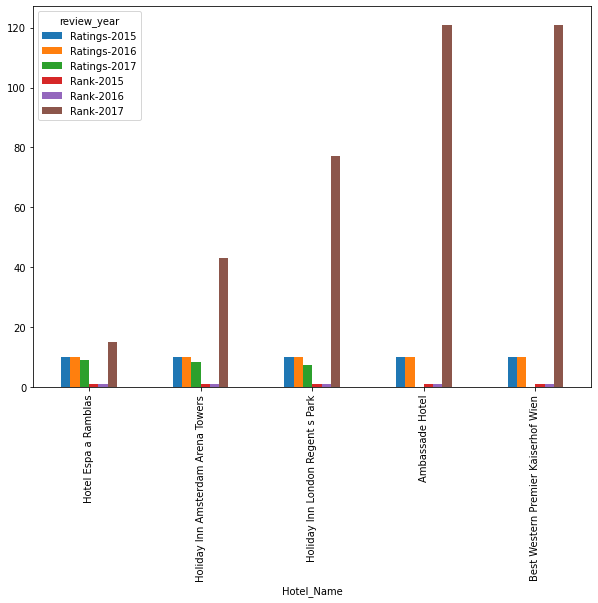

In [ ]:
plot2=df5.plot.bar(figsize=(10,7))

Plot for Top Five Hotels Overall with consistently high ratings,

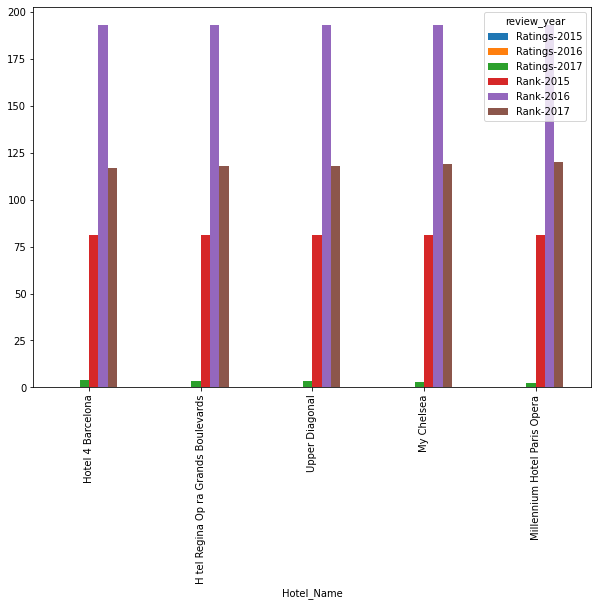

In [ ]:
plot1 =df7.plot.bar(figsize=(10,7))

In [ ]:
df6=df4.tail(5)
df6=df6.rename(columns={2015:"Ratings-2015",2016:"Ratings-2016",2017:"Ratings-2017"})
df6

review_year,Ratings-2015,Ratings-2016,Ratings-2017,Rank-2015,Rank-2016,Rank-2017,Rank_total
Hotel_Name,,,,,,,
Hotel 4 Barcelona,0.0,0.0,3.8,81.0,193.0,117.0,391.0
H tel Regina Op ra Grands Boulevards,0.0,0.0,3.3,81.0,193.0,118.0,392.0
Upper Diagonal,0.0,0.0,3.3,81.0,193.0,118.0,392.0
My Chelsea,0.0,0.0,2.9,81.0,193.0,119.0,393.0
Millennium Hotel Paris Opera,0.0,0.0,2.5,81.0,193.0,120.0,394.0


In [ ]:
df7=df6.drop("Rank_total", axis=1)


review_year,Ratings-2015,Ratings-2016,Ratings-2017,Rank-2015,Rank-2016,Rank-2017
Hotel_Name,,,,,,
Hotel 4 Barcelona,0.0,0.0,3.8,81.0,193.0,117.0
H tel Regina Op ra Grands Boulevards,0.0,0.0,3.3,81.0,193.0,118.0
Upper Diagonal,0.0,0.0,3.3,81.0,193.0,118.0
My Chelsea,0.0,0.0,2.9,81.0,193.0,119.0
Millennium Hotel Paris Opera,0.0,0.0,2.5,81.0,193.0,120.0


In [ ]:
d10=df4.sort_values(by=['Rank-2015','Rank-2016', 'Rank-2017'], ascending=[True, False, True])
d10.head(10)

review_year,2015,2016,2017,Rank-2015,Rank-2016,Rank-2017,Rank_total
Hotel_Name,,,,,,,
Lyric H tel Paris,10.0,0.0,10.000000,1.0,193.0,1.0,195.0
Novotel London Tower Bridge,10.0,0.0,10.000000,1.0,193.0,1.0,195.0
Pullman Barcelona Skipper,10.0,0.0,10.000000,1.0,193.0,1.0,195.0
Staunton Hotel B B,10.0,0.0,10.000000,1.0,193.0,1.0,195.0
Haymarket Hotel,10.0,0.0,9.600000,1.0,193.0,6.0,200.0
Hotel Milano Scala,10.0,0.0,9.600000,1.0,193.0,6.0,200.0
The Park City Grand Plaza Kensington Hotel,10.0,0.0,8.800000,1.0,193.0,25.0,219.0
Hampshire Hotel Rembrandt Square Amsterdam,10.0,0.0,8.466667,1.0,193.0,39.0,233.0
The Sumner Hotel,10.0,0.0,7.500000,1.0,193.0,77.0,271.0


In [ ]:
d11=d10.head(5)
d11=d11.drop("Rank_total",axis=1)

Plot for Five Most Improved Hotels" with the highest improvement in average ratings

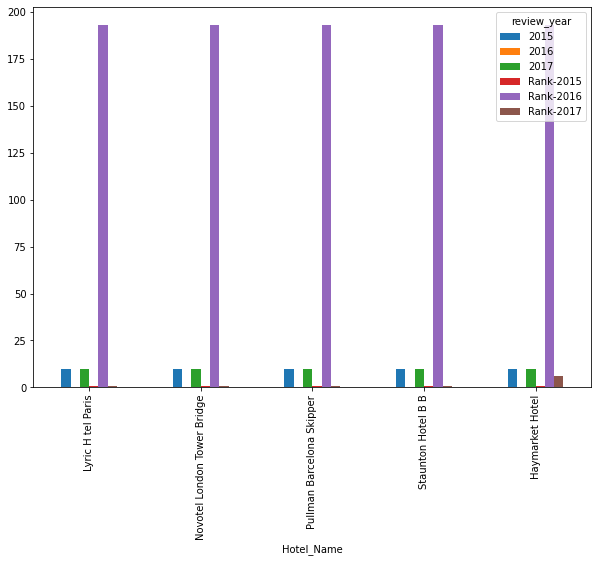

In [ ]:
d11.plot.bar(figsize=(10,7))

# Creating dataframes and dashboards.

In [ ]:
booking_rating_df=pd.DataFrame()

In [ ]:
booking_rating_df= df1.groupby(['Hotel_Name'])['Reviewer_Score'].mean().to_frame()

In [ ]:
booking_rating_df.rename(columns = {'Reviewer_Score':'avg_score'}, inplace = True)

In [ ]:
booking_rating_df_2017=df1[df1['Review_Date'].dt.year==2017].groupby(['Hotel_Name'])['Reviewer_Score'].mean().to_frame()

In [ ]:
booking_rating_df_2016=df1[df1['Review_Date'].dt.year==2016].groupby(['Hotel_Name'])['Reviewer_Score'].mean().to_frame()

In [ ]:
booking_rating_df_2015=df1[df1['Review_Date'].dt.year==2015].groupby(['Hotel_Name'])['Reviewer_Score'].mean().to_frame()

In [ ]:
booking_rating_df_2015.rename(columns = {'Reviewer_Score':'score_2015'}, inplace = True)
booking_rating_df_2016.rename(columns = {'Reviewer_Score':'score_2016'}, inplace = True)
booking_rating_df_2017.rename(columns = {'Reviewer_Score':'score_2017'}, inplace = True)

In [ ]:
booking_rating_df.head(2)

,avg_score
Hotel_Name,
41,9.720000
11 Cadogan Gardens,8.535714


In [ ]:
booking_rating_df=pd.merge(booking_rating_df, booking_rating_df_2015, on="Hotel_Name")
booking_rating_df=pd.merge(booking_rating_df, booking_rating_df_2016, on="Hotel_Name")
booking_rating_df=pd.merge(booking_rating_df, booking_rating_df_2017, on="Hotel_Name")

In [ ]:
booking_rating_df.head()

,avg_score,score_2015,score_2016,score_2017
Hotel_Name,,,,
41,9.720000,9.60,9.733333,9.760000
11 Cadogan Gardens,8.535714,7.70,9.020000,8.428571
1K Hotel,7.850000,7.90,7.433333,8.111111
25hours Hotel beim MuseumsQuartier,8.762500,8.76,8.960714,8.338462
AC Hotel Barcelona Forum a Marriott Lifestyle Hotel,7.760000,5.95,7.964286,8.385714


In [ ]:
booking_rating_df['improvement'] = booking_rating_df['score_2017']-booking_rating_df['score_2015']

In [ ]:
booking_rating_top5=booking_rating_df.sort_values(by = ['avg_score', 'score_2017','score_2016','score_2015'], ascending = [False, False,False, False], na_position = 'first')[0:5]
booking_rating_top5['Hotel_Name']=booking_rating_top5.index
booking_rating_top5

,avg_score,score_2015,score_2016,score_2017,improvement,Hotel_Name
Hotel_Name,,,,,,
Hotel du Petit Moulin,10.000000,10.00,10.000000,10.0,0.00,Hotel du Petit Moulin
Hotel Margot House,9.866667,9.76,10.000000,10.0,0.24,Hotel Margot House
Luxury Suites Amsterdam,9.825000,9.70,9.822222,10.0,0.30,Luxury Suites Amsterdam
Le 123 S bastopol Astotel,9.818182,10.00,9.800000,9.8,-0.20,Le 123 S bastopol Astotel
Haymarket Hotel,9.781818,9.80,9.733333,9.8,0.00,Haymarket Hotel


In [ ]:
booking_rating_bottom5=booking_rating_df.sort_values(by = ['avg_score', 'score_2017','score_2016','score_2015'], ascending = [True, True,True, True], na_position = 'first')[0:5]
booking_rating_bottom5['Hotel_Name']=booking_rating_bottom5.index
booking_rating_bottom5

,avg_score,score_2015,score_2016,score_2017,improvement,Hotel_Name
Hotel_Name,,,,,,
Savoy Hotel Amsterdam,5.434783,8.800000,5.483333,5.040,-3.760000,Savoy Hotel Amsterdam
H tel des Ducs D Anjou,5.525000,6.700000,5.400000,5.000,-1.700000,H tel des Ducs D Anjou
The Tophams Hotel,5.741176,5.433333,5.720000,6.025,0.591667,The Tophams Hotel
Villa Eugenie,5.840000,7.500000,6.200000,3.750,-3.750000,Villa Eugenie
Antares Hotel Rubens,6.020000,5.400000,6.833333,4.200,-1.200000,Antares Hotel Rubens


In [ ]:
booking_rating_improvement5=booking_rating_df.sort_values(by = ['improvement', 'score_2017','score_2016','score_2015'], ascending = [False, False,False, False], na_position = 'first')[0:5]
booking_rating_improvement5['Hotel_Name']=booking_rating_improvement5.index
booking_rating_improvement5

,avg_score,score_2015,score_2016,score_2017,improvement,Hotel_Name
Hotel_Name,,,,,,
Holiday Inn Paris Op ra Grands Boulevards,7.783333,3.8,7.900000,9.033333,5.233333,Holiday Inn Paris Op ra Grands Boulevards
H tel De Sers Champs Elys es Paris,7.660000,3.3,9.600000,8.466667,5.166667,H tel De Sers Champs Elys es Paris
Best Western Hotel Ascot,7.400000,3.3,6.588889,8.276923,4.976923,Best Western Hotel Ascot
UNA Hotel Mediterraneo,8.260000,5.0,8.900000,9.600000,4.600000,UNA Hotel Mediterraneo
Vienna Sporthotel,7.585714,4.2,7.300000,8.575000,4.375000,Vienna Sporthotel


In [ ]:
## melt the datframe for plot
booking_rating_improvement5 = booking_rating_improvement5.melt(id_vars=['Hotel_Name'], var_name='year', value_name='review_score_year')

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

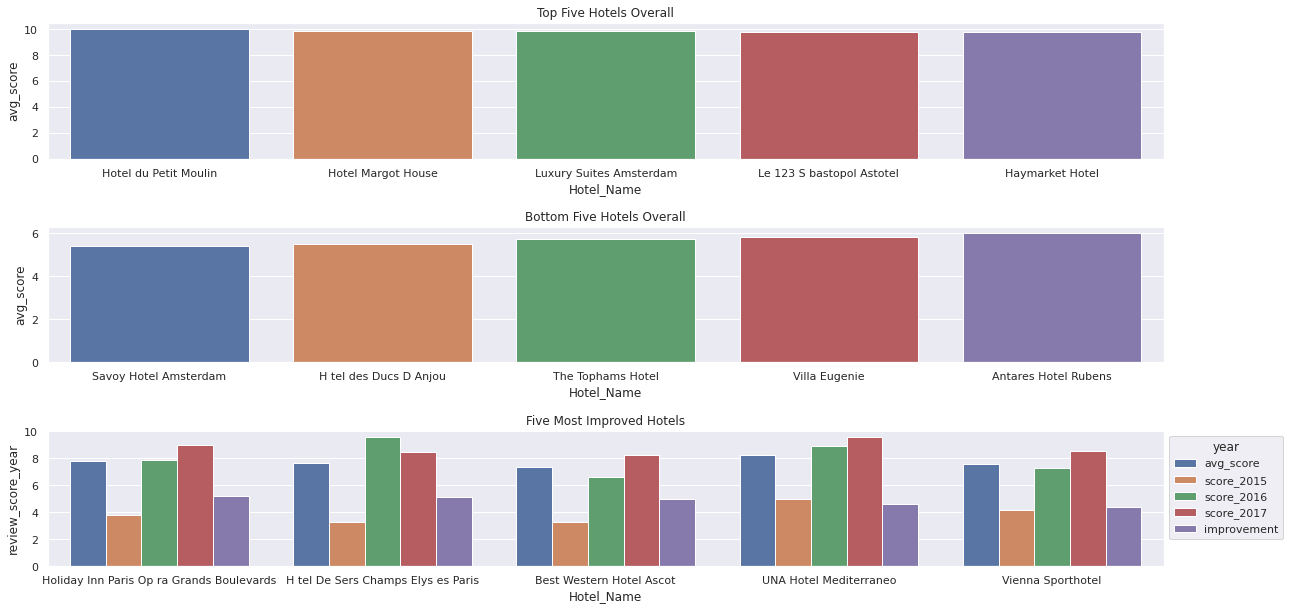

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1)
sns.set(font_scale=1)
sns.set(rc = {'figure.figsize':(30,15)})

sns.barplot(y =booking_rating_top5.avg_score, x =booking_rating_top5.Hotel_Name,data = booking_rating_top5,ax=axs[0])
sns.barplot(y =booking_rating_bottom5.avg_score, x =booking_rating_bottom5.Hotel_Name,data = booking_rating_bottom5,ax=axs[1])
sns.barplot(y =booking_rating_improvement5.review_score_year, x =booking_rating_improvement5.Hotel_Name,  hue='year',data = booking_rating_improvement5,ax=axs[2])

axs[0].title.set_text('Top Five Hotels Overall')
axs[1].title.set_text('Bottom Five Hotels Overall')
axs[2].title.set_text('Five Most Improved Hotels')
sns.move_legend(axs[2], "upper left", bbox_to_anchor=(1, 1))

plt.subplots_adjust(hspace = 0.5)